# Маркетинговый анализ приложения "X"

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Задание-функций-для-расчёта-и-анализа-бизнес-метрик" data-toc-modified-id="Задание-функций-для-расчёта-и-анализа-бизнес-метрик-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание функций для расчёта и анализа бизнес-метрик</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-маркетинговых-метрик" data-toc-modified-id="Исследование-маркетинговых-метрик-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование маркетинговых метрик</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Обзор данных


In [10]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [11]:
# загрузим исходные датасеты и передадим их переменным

visits = pd.read_csv('D:\Jypiter\datasets\\bussiness_data_analyses\\visits_info_short.csv')
orders = pd.read_csv('D:\Jypiter\datasets\\bussiness_data_analyses\\orders_info_short.csv')
costs = pd.read_csv('D:\Jypiter\datasets\\bussiness_data_analyses\\costs_info_short.csv')                        

In [12]:
#выведем на экран информацию о датафреймах и их первые пять строк.

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [13]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [14]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

## Предобработка данных

In [15]:
# Приводим названия столбцов датафрейма к змеинному регистру

visits.rename(columns={'User Id':'user_id',
                       'Session Start': 'session_start',
                      'Session End': 'Session_end'},
              inplace=True)
visits.columns = visits.columns.str.lower()

orders.rename(columns={'User Id':'user_id',
                       'Event Dt': 'event_dt',
                       'Revenue': 'revenue'},
                            inplace=True)

costs.columns = costs.columns.str.lower()

In [16]:
#Проверка наличия пропусков в датафреймах

print('Общее количество пропусков в датафрейме "visits"', visits.isna().sum().sum())
print('Общее количество пропусков в датафрейме "orders"', orders.isna().sum().sum())
print('Общее количество пропусков в датафрейме "costs"', costs.isna().sum().sum())

Общее количество пропусков в датафрейме "visits" 0
Общее количество пропусков в датафрейме "orders" 0
Общее количество пропусков в датафрейме "costs" 0


In [17]:
#Проверка наличия дубликатов в датафреймах

print('Общее количество строк-дубликатов в датафрейме "visits"', visits.duplicated().sum().sum())
print('Общее количество строк-дубликатов в датафрейме "orders"', orders.duplicated().sum().sum())
print('Общее количество строк-дубликатов в датафрейме "costs"', costs.duplicated().sum().sum())

Общее количество строк-дубликатов в датафрейме "visits" 0
Общее количество строк-дубликатов в датафрейме "orders" 0
Общее количество строк-дубликатов в датафрейме "costs" 0


In [18]:
# Приведение в соответстующие типы данных

visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Предобработка данных выполнена. В датафреймах не было обнаружено пропусков и дубликатов.\
Для дальнейшей работы с таблицами данные в столбцах с датами были переведены в соответствующий формат.\
Можем приступать к анализу данных.

## Задание функций для расчёта и анализа бизнес-метрик

Первым делом добавим функции для исследования бизнес-показателей по исходным данным:
- get_profiles();
- get_retention();
- get_conversion();
- get_ltv().

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, events, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Добавим также функции для визуализации данных:
- filter_data();
- plot_retention();
- plot_conversion();
- plot_ltv_roi().

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Получим профили пользователей, используя функцию get_profiles().

In [27]:
profiles = get_profiles(visits, orders, costs, costs) # Второй costs для работы функции без датафрейма events
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

In [28]:
print('Минимальная дата привлечения клиента:', profiles['first_ts'].min())
print('Максимальная дата привлечения клиента:', profiles['first_ts'].max())

Минимальная дата привлечения клиента: 2019-05-01 00:00:41
Максимальная дата привлечения клиента: 2019-10-27 23:59:04


Из анализа дат видно, что имеем дело с выборкой с 1 мая 2019 по 27 октября 2019

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится наибольшее количество платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих пользователей из каждой страны.

In [29]:
# Построение сводной таблицы.
# строки: cтраны;
# значения: количество уникальных пользователей, доля платящих пользователей

region_payers = ( profiles.pivot_table(index='region', aggfunc={'user_id':'nunique', 'payer':'mean'})
                 .rename(columns={'payer':'payers_share'})
                 .sort_values(by='payers_share', ascending=False)
                )

# Изменяем порядок столбцов 
region_payers = region_payers[region_payers.columns[[1, 0]]]
region_payers

user_id  payers_share
region                              
United States   100002      0.069019
Germany          14981      0.041119
UK               17575      0.039829
France           17450      0.037994

Заметим, что превалирующее количество пользователей из США, а также доля платящих пользовталей из этого региона в 1.5 раза выше, чем в других регионах

Выясним, с каких устройств пользователи заходят в приложение, и с какого гаджета больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих пользователей для каждого устройства.

In [30]:
device_payers = ( profiles.pivot_table(index='device', aggfunc={'user_id':'nunique', 'payer':'mean'})
                 .rename(columns={'payer':'payers_share'})
                 .sort_values(by='payers_share', ascending=False)
                )

# Изменяем порядок столбцов 
device_payers = device_payers[device_payers.columns[[1, 0]]]
device_payers

user_id  payers_share
device                        
Mac        30042      0.063644
iPhone     54479      0.062079
Android    35032      0.058518
PC         30455      0.050468

Заметим, что iPhone наиболее растпространенный девайс для входа в приложение.
Наивысшие доли платящих пользователей с Mac и iPhone. С Android и PC ниже. 

Выясним, с каких рекламных каналлов пользователи чаще заходят в приложение и откуда больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала.

In [31]:
channel_payers = ( profiles.pivot_table(index='channel', aggfunc={'user_id':'nunique', 'payer':'mean'})
                 .rename(columns={'payer':'payers_share'})
                 .sort_values(by='payers_share', ascending=False)
                )

# Изменяем порядок столбцов 
channel_payers = channel_payers[channel_payers.columns[[1, 0]]]
channel_payers

user_id  payers_share
channel                                  
FaceBoom              29144      0.122049
AdNonSense             3880      0.113402
lambdaMediaAds         2149      0.104700
TipTop                19561      0.096007
RocketSuperAds         4448      0.079137
WahooNetBanner         8553      0.052964
YRabbit                4312      0.038265
MediaTornado           4364      0.035747
LeapBob                8553      0.030633
OppleCreativeMedia     8605      0.027077
organic               56439      0.020553

Наибольшее число клиентов приходит не из каналов привлечения (Organic), но и доля платящих среди них самая низкая.
Наивысшие доли платящих пользователей - это клиенты, привлеченные из каналов:
 - FaceBoom;
 - AdNonSense;
 - lambdaMediaAds.

## Исследование маркетинговых метрик

Посчитаем суммарные расходы на рекламу.
Сделаем это двумя способами:
1. Суммируем все значения в столбце 'costs' датафрейма costs.
2. Суммируем все значения в столбце 'acquisition_cost' датафрейма profiles.

Результаты округлим до целого числа и сравним. Второй способ позволит выполнить проверку построения данных в столбце acquisition_cost' датафрейма profiles.

In [32]:
total_costs1 = round(costs['costs'].sum())
total_costs2 = round(profiles['acquisition_cost'].sum(), 0)

print('Суммарные расходы на рекламу (1-ый способ):', total_costs1)
print('Суммарные расходы на рекламу (2-ой способ):', total_costs1)

Суммарные расходы на рекламу (1-ый способ): 105497
Суммарные расходы на рекламу (2-ой способ): 105497


In [33]:
channel_costs = ( costs.pivot_table(index='channel', aggfunc={'costs':'sum'})
                 .sort_values(by='costs', ascending=False)
                )
#
channel_costs['share, %'] = (channel_costs['costs'] / channel_costs['costs'].sum() * 100)
channel_costs

costs   share, %
channel                                
TipTop              54751.30  51.898295
FaceBoom            32445.60  30.754910
WahooNetBanner       5151.00   4.882589
AdNonSense           3911.25   3.707441
OppleCreativeMedia   2151.25   2.039152
RocketSuperAds       1833.00   1.737485
LeapBob              1797.60   1.703930
lambdaMediaAds       1557.60   1.476436
MediaTornado          954.48   0.904744
YRabbit               944.22   0.895018

В TipTop было вложено более половины рекламного бюджета, однако ресурс не попал в ТОП-3 источника по конверсии. Возможно не целевой канал привлечения, либо реклама настроена неправильно или высокая стоимость клиента.
В FaceBoom было вложена большая сумма за рассматриваемый период, но и привлечено большое количество клиентов, а с lambdaMediaAds, несмотря на низкие расходы, пришла высокая доля платящих клиентов.

Рассмотрим расходы на рекламу в разбивке по каналам в динамике:

In [34]:
channel_costs_dynamic = ( costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')                
                )
channel_costs_dynamic.head(10)

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95     113.3     2.52          6.24                4.25   
2019-05-02       34.65      78.1     2.94          5.04                4.25   
2019-05-03       47.25      85.8     2.73          6.96                5.75   
2019-05-04       51.45     136.4     3.99          9.36                4.25   
2019-05-05       36.75     122.1     4.62         11.04                5.50   
2019-05-06       43.05     118.8     4.62          9.60                5.00   
2019-05-07       30.45     101.2     4.20          8.88                5.75   
2019-05-08       37.80     100.1     3.99          6.72                4.25   
2019-05-09       37.80      93.5     3.78          6.72                4.25   
2019-05-10       46.20     104.5     3.36          8.64                5.75   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                           
2019-05-01          21.060    80.0            10.8      8.1            17.6  
2019-05-02          16.965    55.0             7.2      9.9            16.8  
2019-05-03          16.380    64.0             8.4      9.0            16.8  
2019-05-04          17.550    70.0            10.8     15.6            17.6  
2019-05-05          27.495    78.0            12.0      9.6            12.8  
2019-05-06          21.645    78.0            19.2     10.5            14.4  
2019-05-07          18.720    77.0             8.4      9.3            16.0  
2019-05-08          18.135    57.0             7.8     12.6            11.2  
2019-05-09          18.720    46.0            11.4     11.1            10.4  
2019-05-10          22.230    74.0            14.4     10.5            20.0

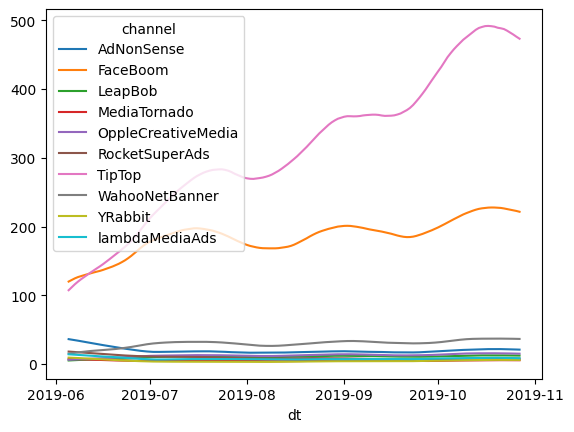

In [50]:
channel_costs_dynamic.plot()
plt.show()

Кривые получились с большим разбросом. Сгладим их с помощью функции filter_data().
Зададим недельную и месячную скользящие средние:

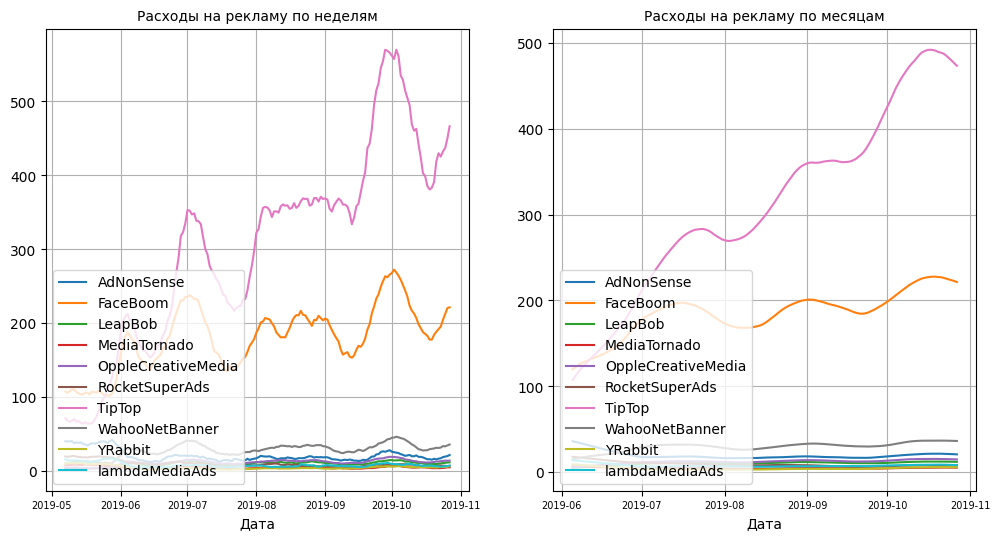

In [36]:
channel_costs_dynamic_roling7 = filter_data(channel_costs_dynamic, 7)

plt.figure(figsize = (12,6))

ax1 = plt.subplot(1,2,1)
channel_costs_dynamic_roling7.plot(grid=True, ax = ax1)#, ax=ax1)
plt.legend(bbox_to_anchor=(0,0), loc='lower left', fontsize=10)
plt.xlabel('Дата', fontsize=10)
plt.xticks(fontsize=7)
plt.title('Расходы на рекламу по неделям', fontsize=10)

channel_costs_dynamic_roling30 = filter_data(channel_costs_dynamic, 30)

ax2 = plt.subplot(1,2,2)
channel_costs_dynamic_roling30.plot(grid=True, ax = ax2)
plt.legend(bbox_to_anchor=(0,0), loc='lower left', fontsize=10)
plt.xlabel('Дата', fontsize=10)
plt.xticks(fontsize=7)
plt.title('Расходы на рекламу по месяцам', fontsize=10)

plt.show()

Расходы на TipTop и FaceBoom в разы превышают остальные источники, а за последние месяцы еще и выросли в 5 и 2 раза соттветственно. Необходимо смотреть окупаемость и принимать решения.

Рассчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника:

In [37]:
cac = profiles[['user_id', 'acquisition_cost'] + ['channel']].drop_duplicates()

# считаем средний CAC
cac_avg = round(cac.query('channel != "organic"')['acquisition_cost'].mean(), 2)
print('Средняя стоимость привлечения клиента без разреза по каналам:', cac_avg)

cac = (
    cac.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by='cac', ascending=False)
    )
cac

Средняя стоимость привлечения клиента без разреза по каналам: 1.13


cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

Наблюдаем чрезмерно высокие удельные траты на пользователя в канале: TipTop.
FaceBoom в свою очередь, близок по удельной стоимости к другим каналом.

## Оценка окупаемости рекламы

Проанализируем окупаемость рекламы. Моментом анализа будем считать 1 ноября 2019 года. Горизонт анализа - 14 дней.

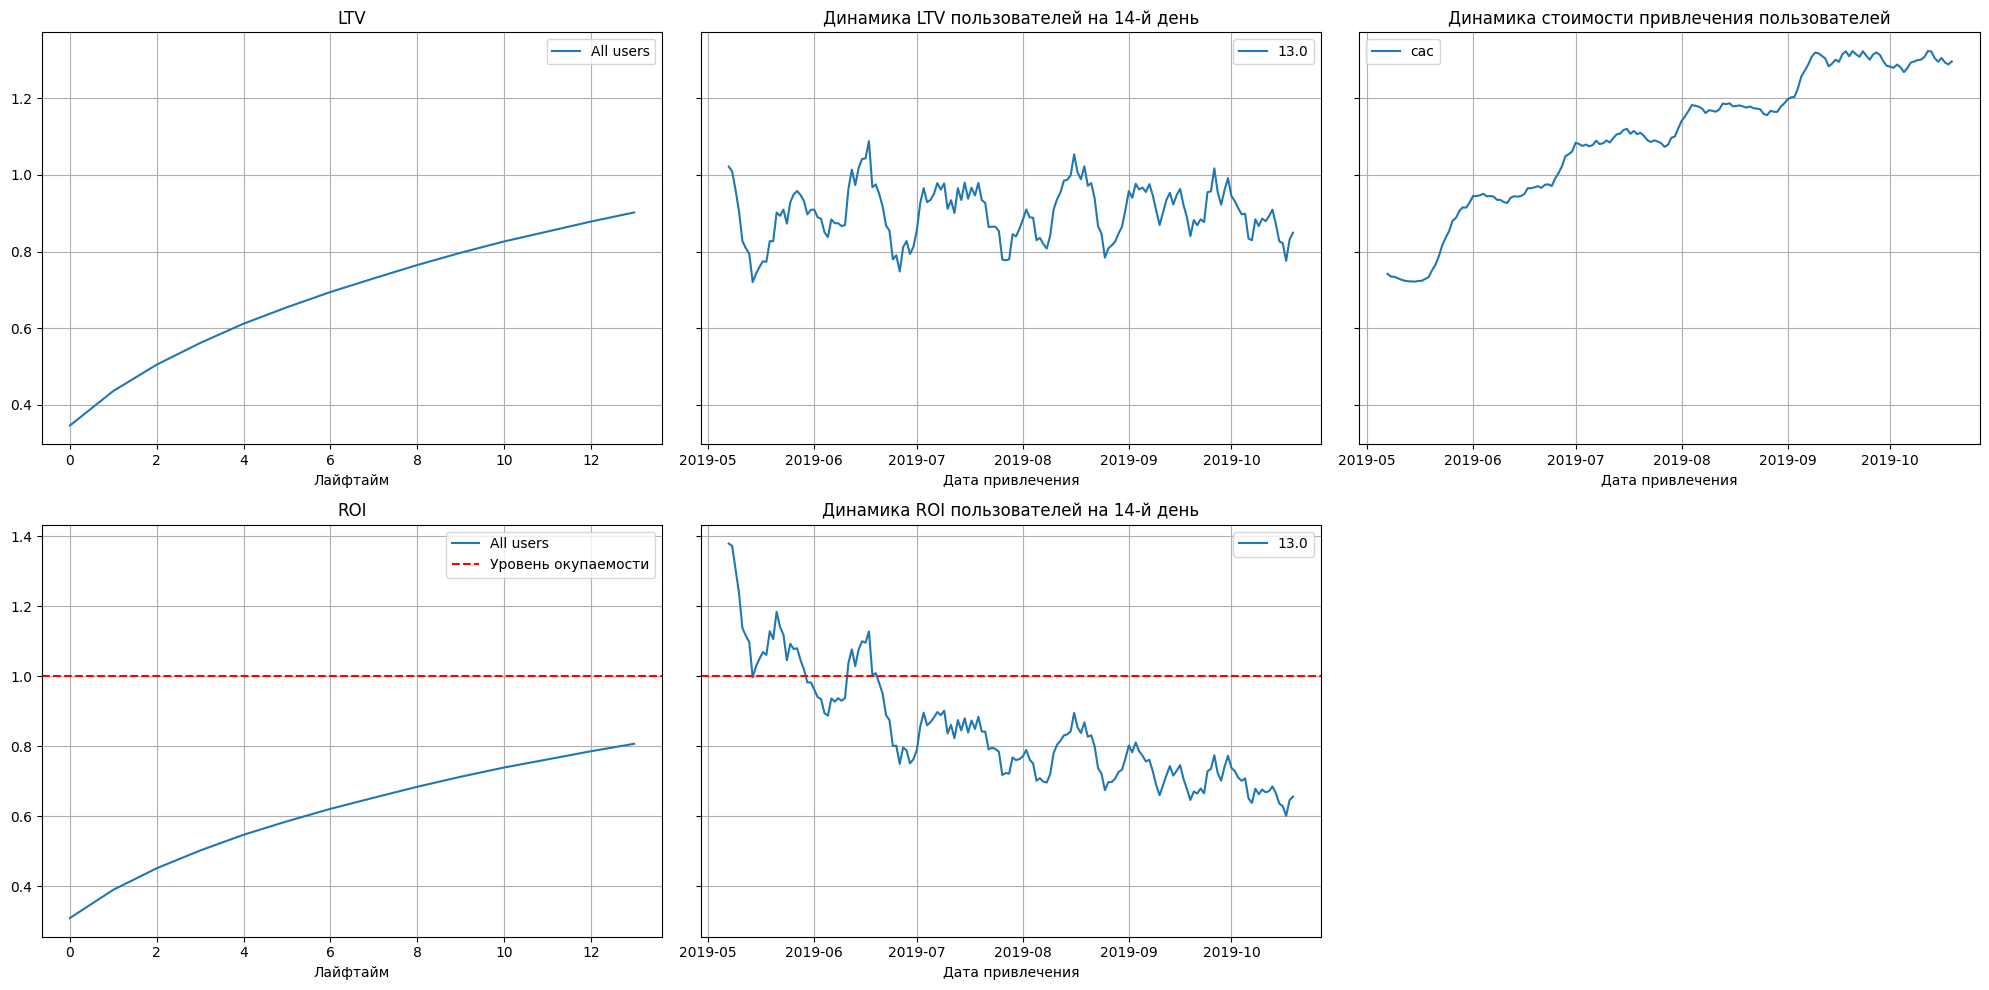

In [38]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

profiles_not_organic = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, 
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Отметим корректность работы функций: LTV и ROI непрерывно растут.\
Динамика LTV имеет сезонность: каждые 2-4 недели имеются локальные минимумы и максимумы. Средняя LTV на 14 день составляет 0.85.\
По графику ROI видно, что вложения в рекламу не окупаются. ROI на 14 день всего 0.8\
Ранее обнаружили, что рекламные затраты на каналы: TipTop и FaceBoom сильно выросли за последние месяцы. Графики динамики CAC и ROI это подверждают. CAC растёт, ROI снижается со временем.


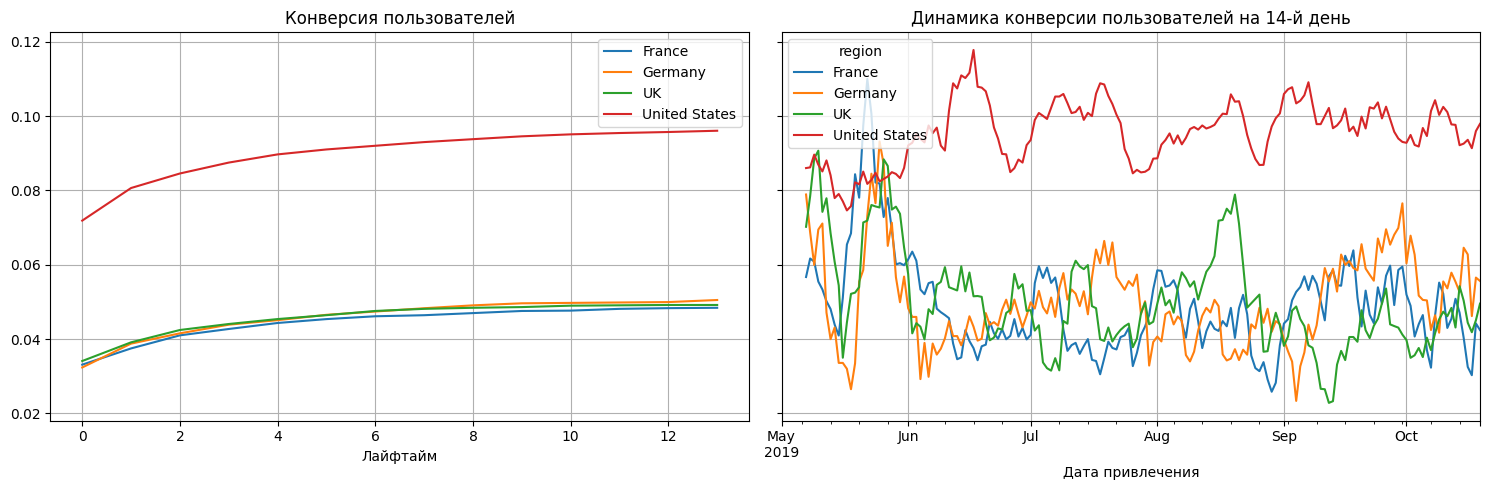

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия, как и должна, непрерывно растет, что говорит о корректности работы функции.\
Динамика конверсии имеет сезонность.
Видно, что у пользователей из США конверсия в среднем выше в 2 раза, чем у пользователей из других стран.

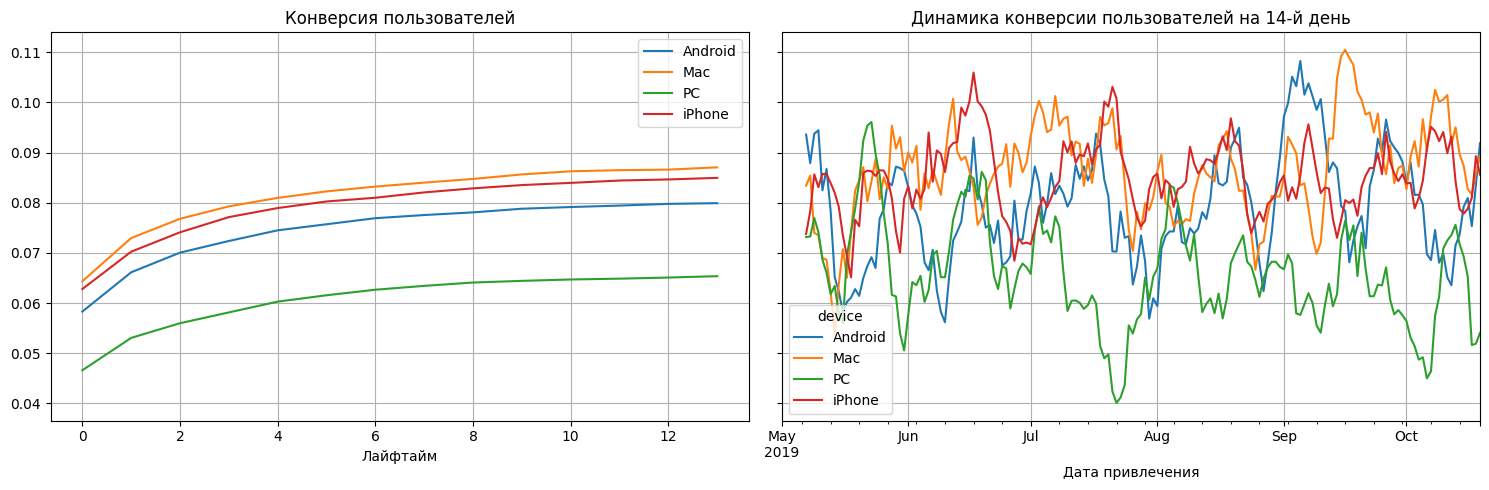

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наивысшие значения конверсии у пользователей яблочной продукции. Самые низкие значения у пользователей ПК. Либо существует техническая неисправность, связанная с оплатой в desktop-версией приложения из-за чего часть клиентов не может конвертироваться в платящих, либо просто пользователи ПК склонны реже покупать наши услуги.

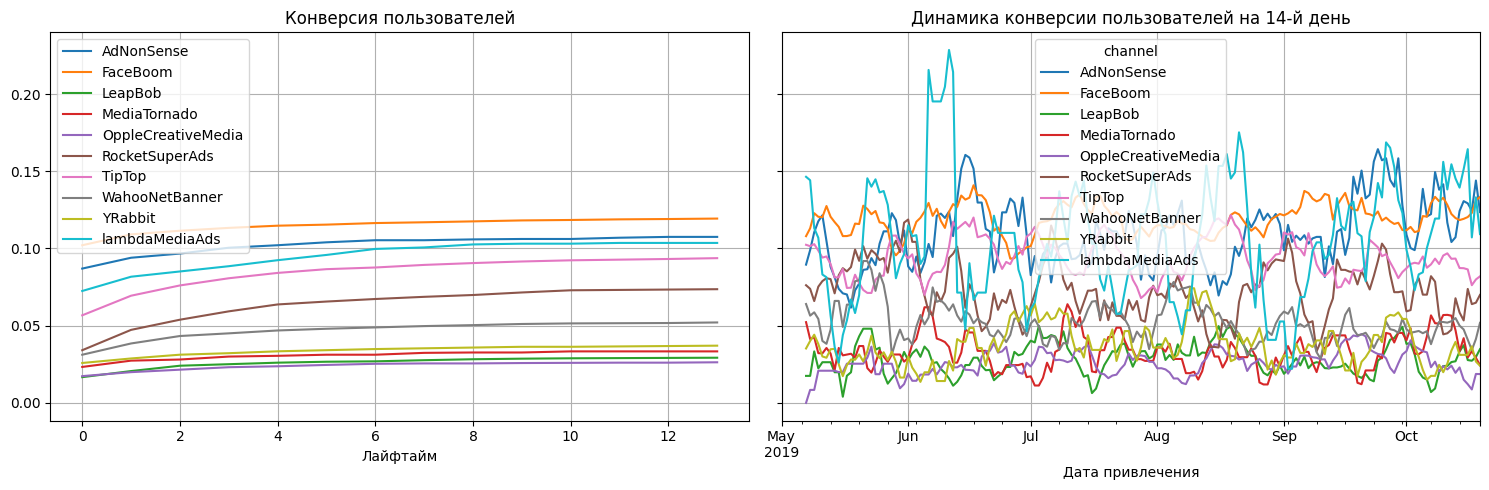

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Видно, что у Faceboom и AdNonSense высокие коэффициенты конверсии. Запомним это.

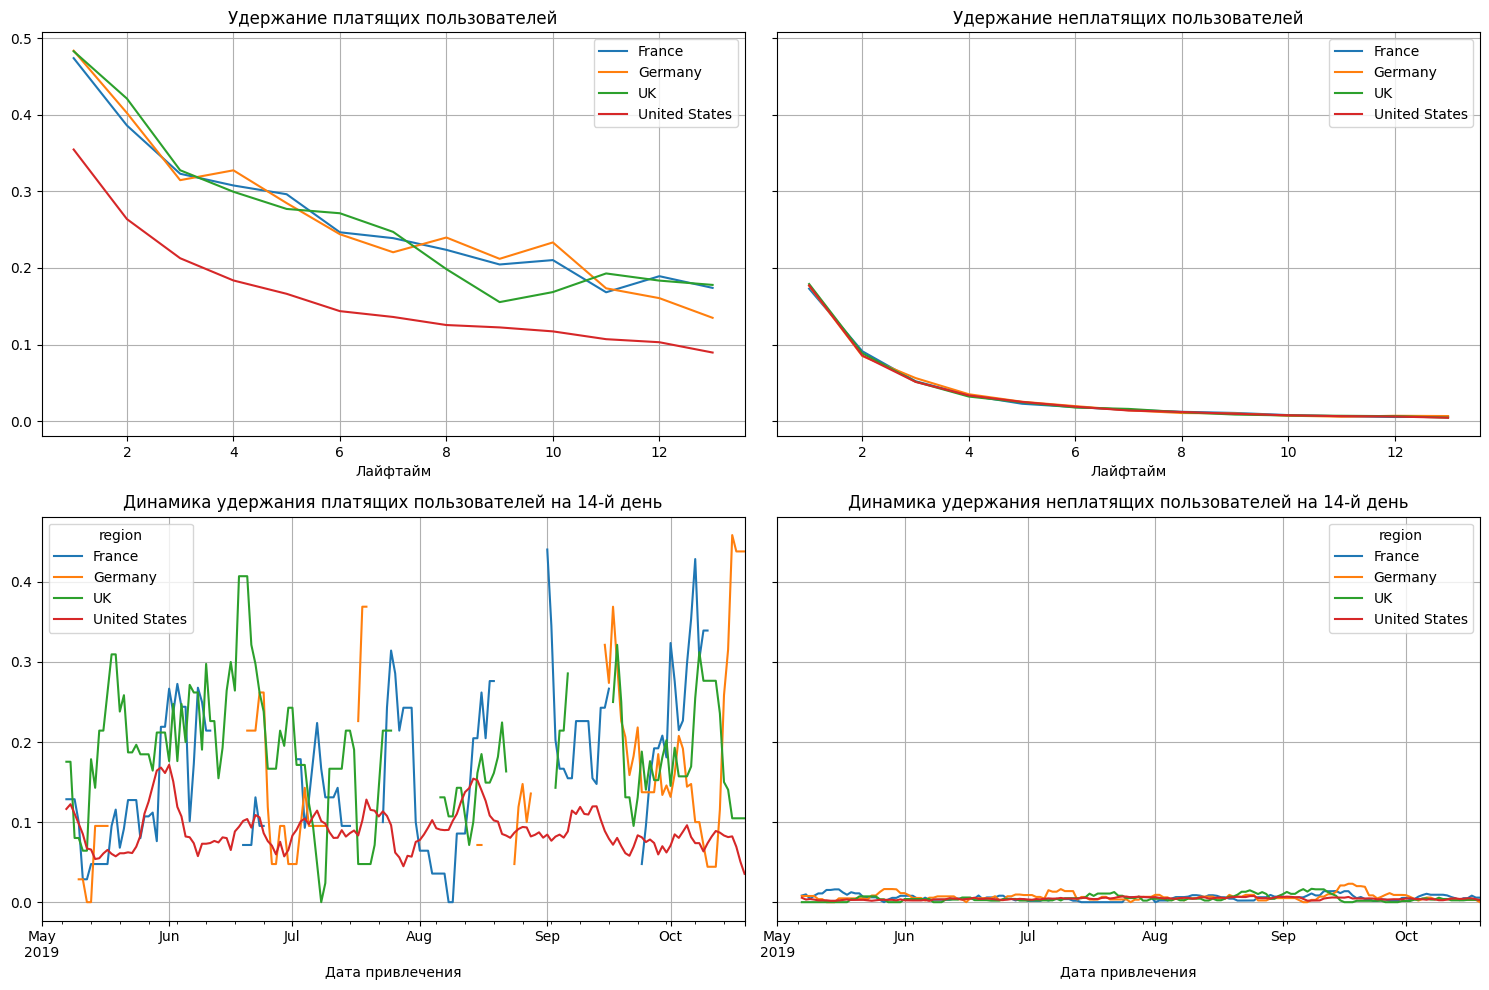

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей выше, чем неплатящих. Всё логично.\
Видно, что удержание пользователей из США стабильно ниже пользователей из других стран. Возможно таргетная реклама в регионе США настроена не самым эффективным образом, либо есть какие-то технические трудности у пользователей из США (может быть у них не работает наше приложение без VPN, что быстро отталкивает пользователей )

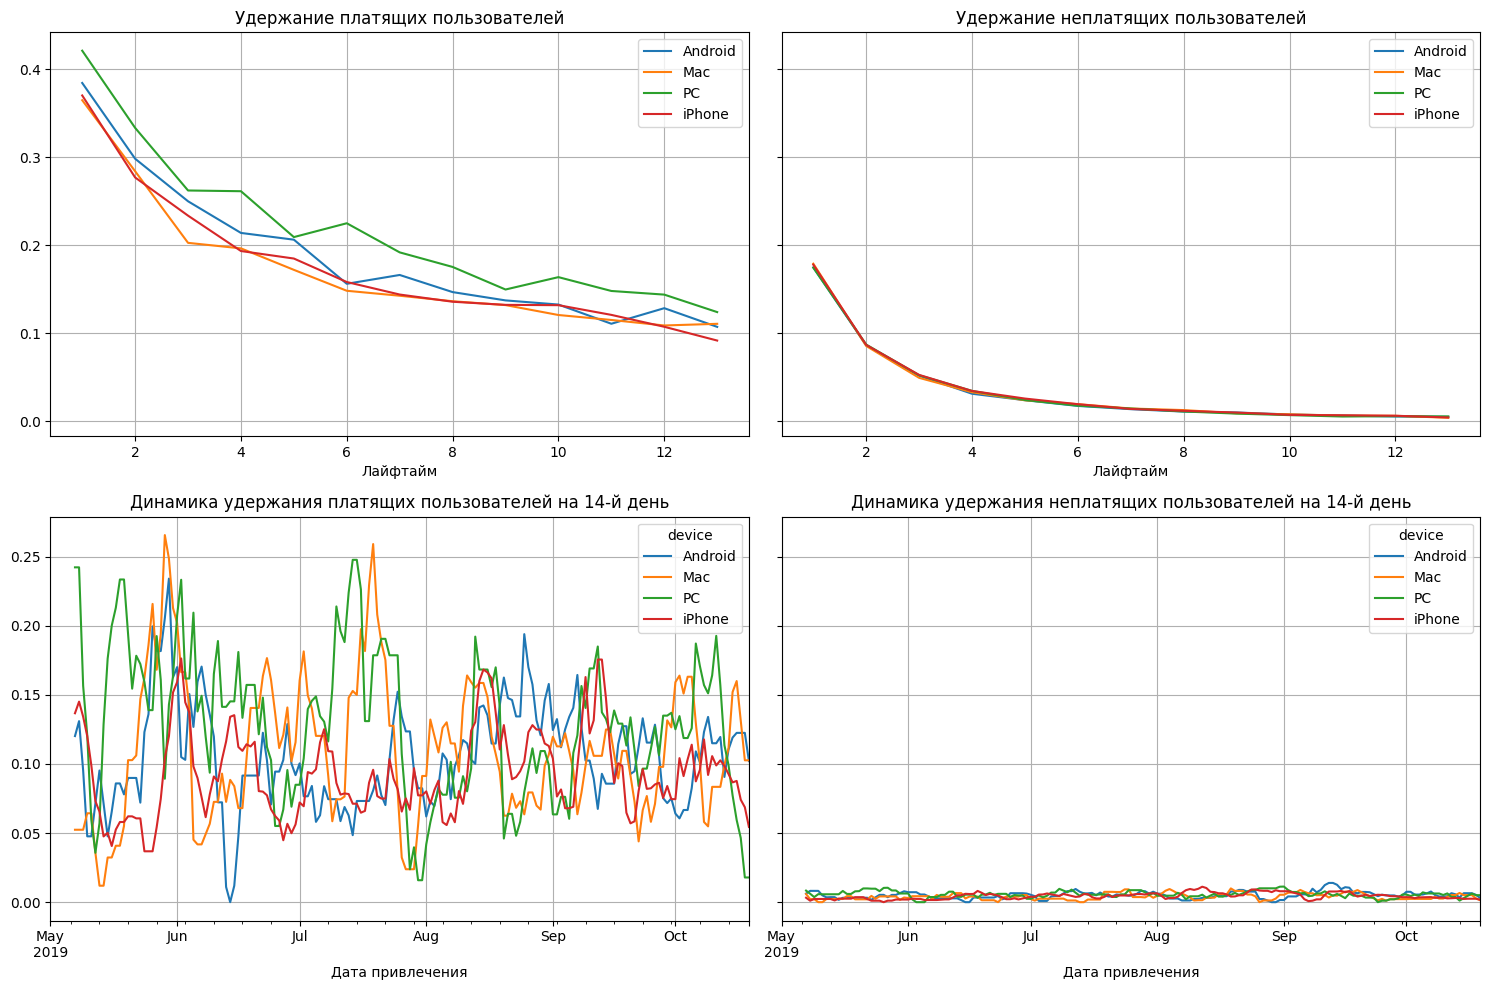

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из графиков можно сделать вывод, что удержание пользователей примерно одинаково, независимо от девайсов, с которых они заходят.

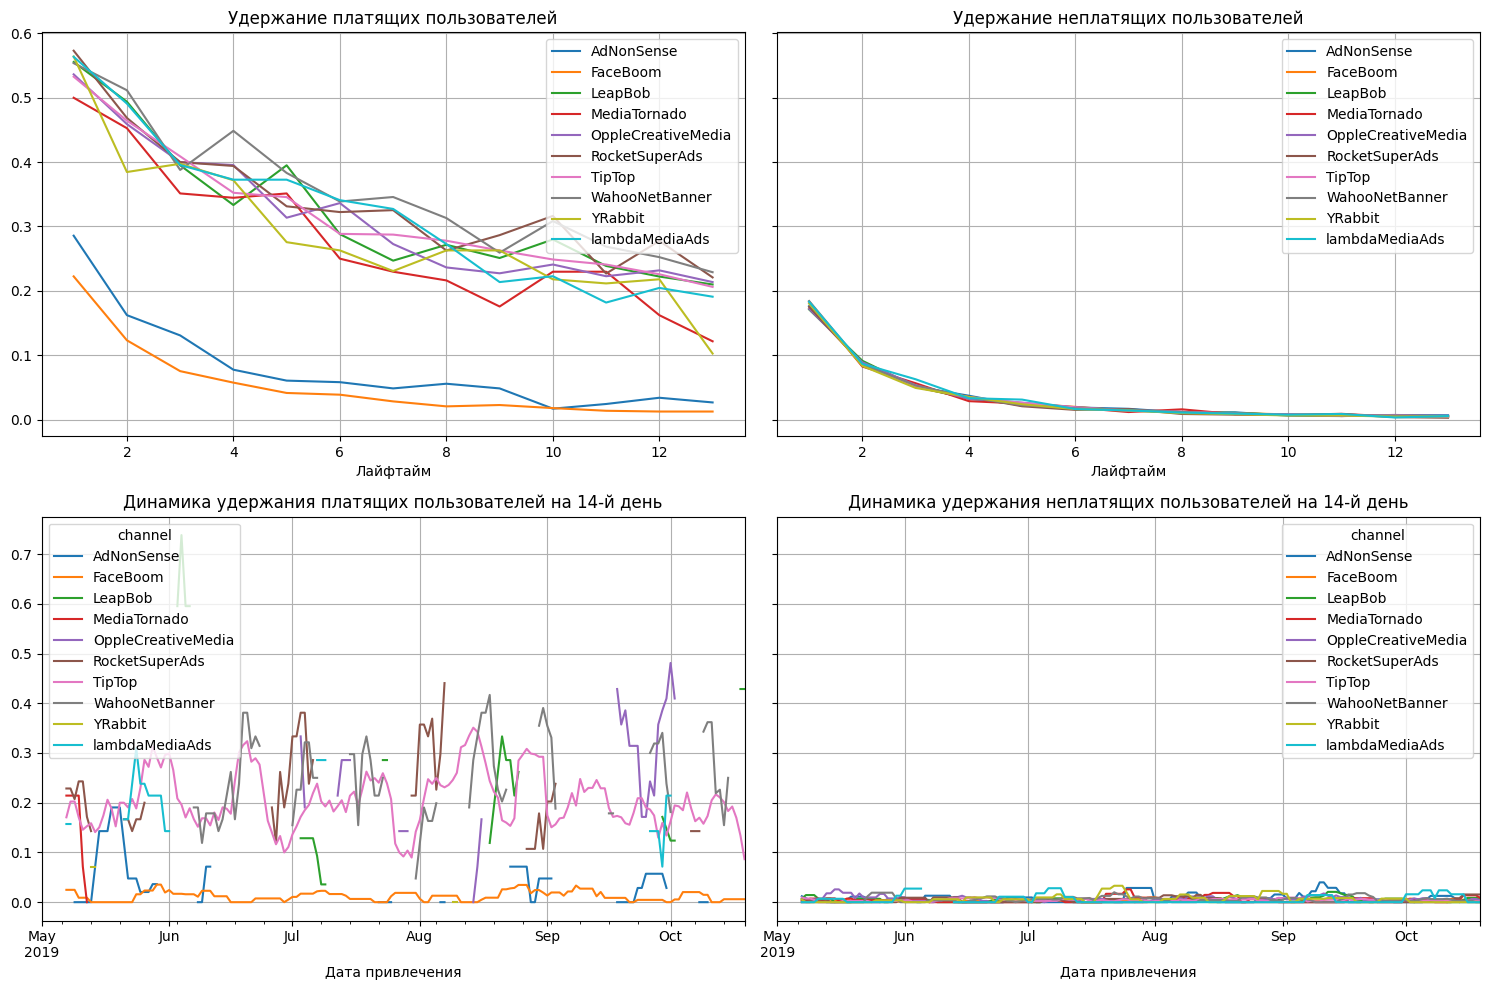

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Наблюдаем низкое удержание пользователей из каналов FaceBoom и AdNonSense. Возможно привлекается нецелевая аудитория, которая быстро уходит из приложения. Маркетинговому отделу необходимо пересмотреть настройки рекламы в данных каналах.

Пронализируем окупаемость в разрезе стран, откуда заходят пользователи:

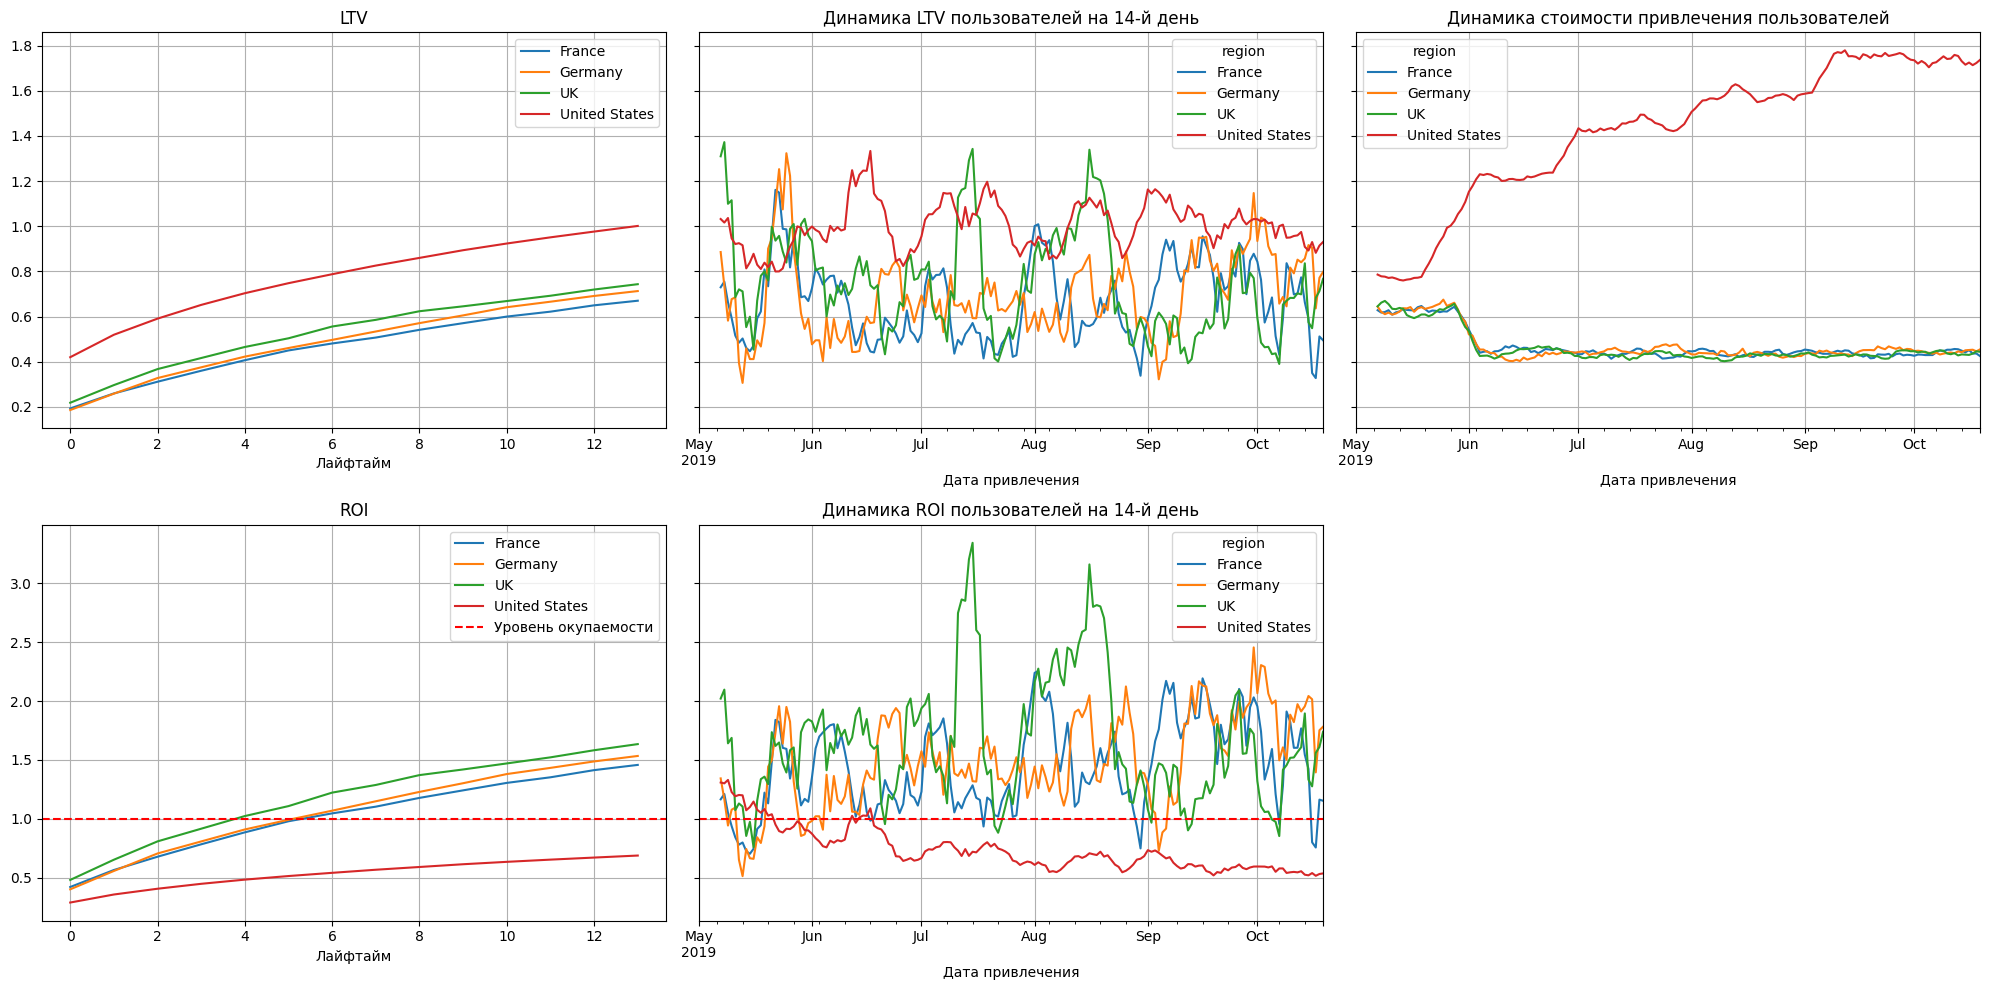

In [45]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Помня о том, что основное количество пользователей из США, значимость этого региона для нас самая высокая.
Из графика LTV видно, что пользователи из США приносят больше дохода, чем пользователи из других стран.
При этом помним, что из этого региона привлекается в разы больше пользователей, а LTV выше незначительно. Возможно дело в низком удержание в данном регионе, либо в высоких затратах рекламных каналов, ориентированных на США.
Из графика динамики CAC видно, что рост рекламных расходов вызван именно за счет пользователей из США.
Из графика динамики ROI можно сказать, что только они и не окупаются. А так как их число превалирует над остальными, то отсюда и общий негативный результат.
Необходимо расследовать рост стоимости, почему в мае резко увеличилась стоимость привлечениия клиентов из США.

Пронализируем окупаемость в разрезе типа устройств, с которых заходят пользователи:

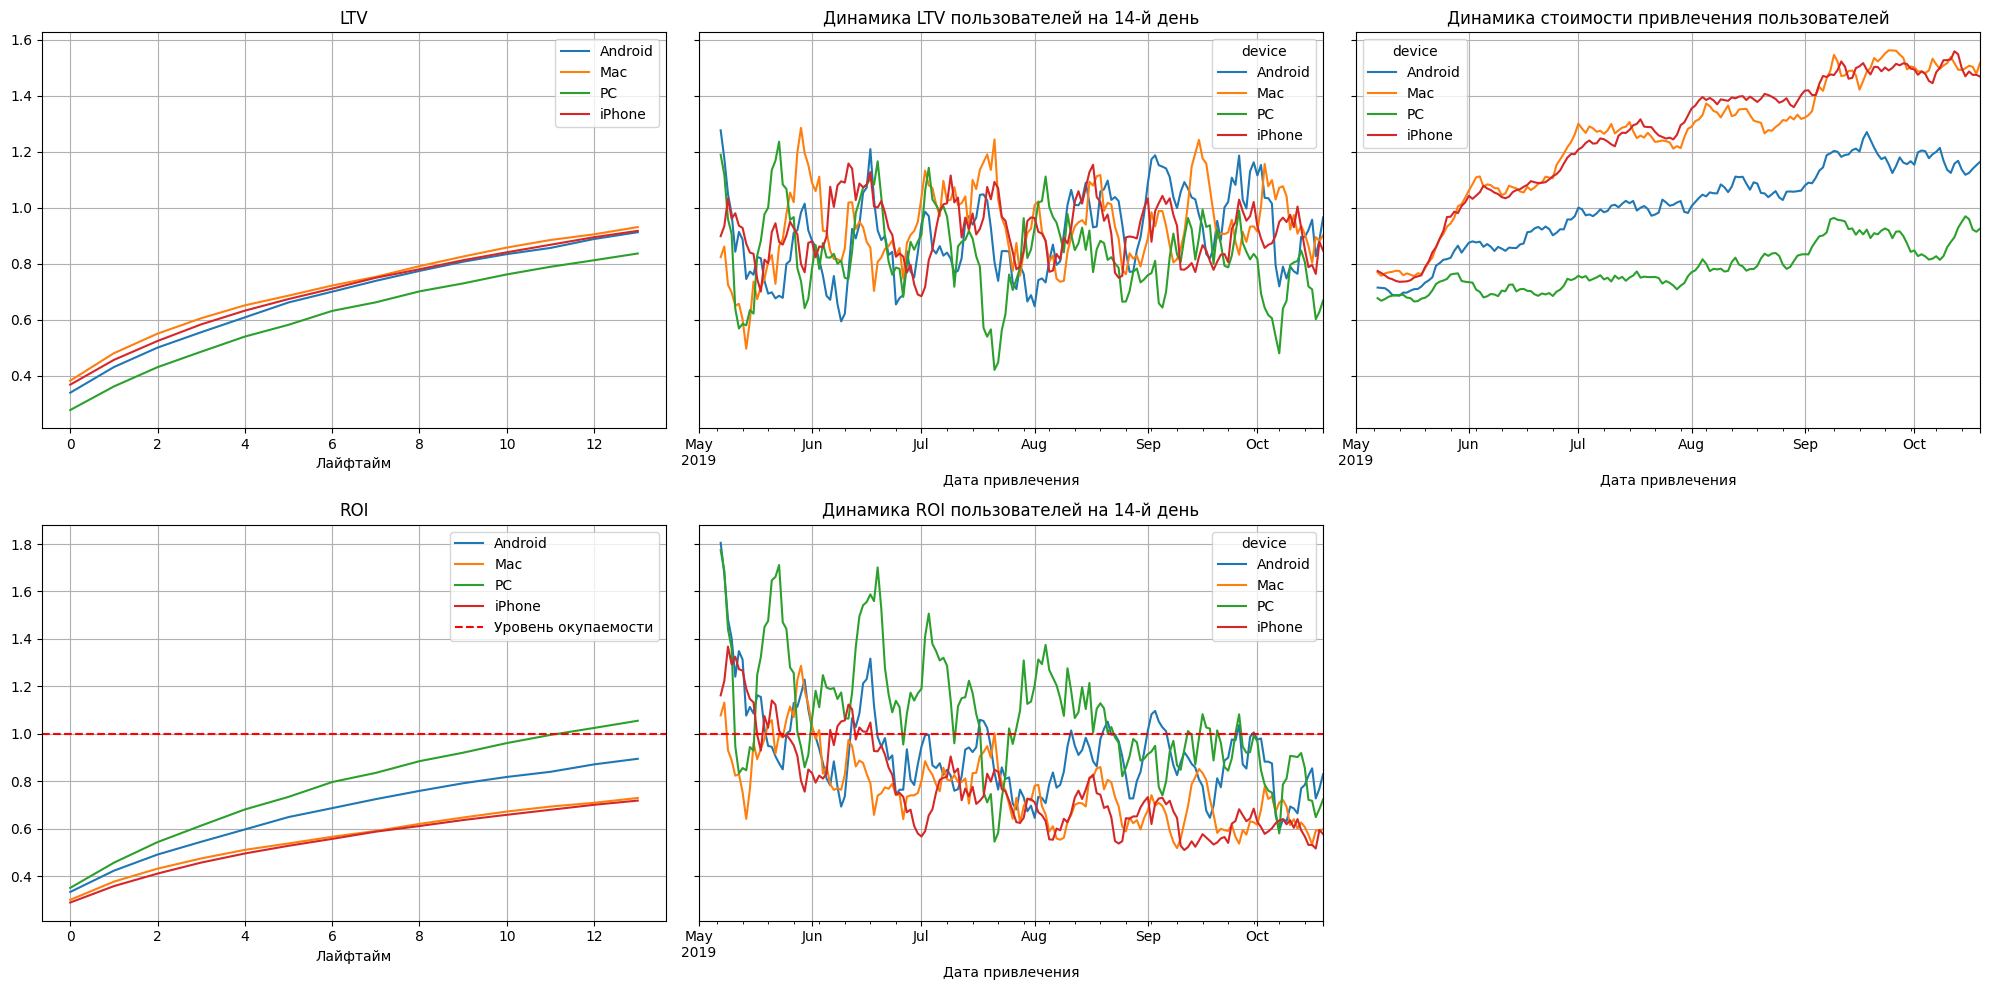

In [46]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видно, что пользователи с PC имеют меньшую LTV, но и меньшую CAC. Пользователи данных устройств единственные окупаются. Делают они это за 13 дней.\
Пользователи iPhone и Mac хоть имеют большую LTV, но не окупаются за 14 дней. Причина также видна на графике динамики CAC. Стоимость их привлечения выше.

Пронализируем окупаемость в разрезе каналов привлечения клиентов, откуда заходят пользователи:

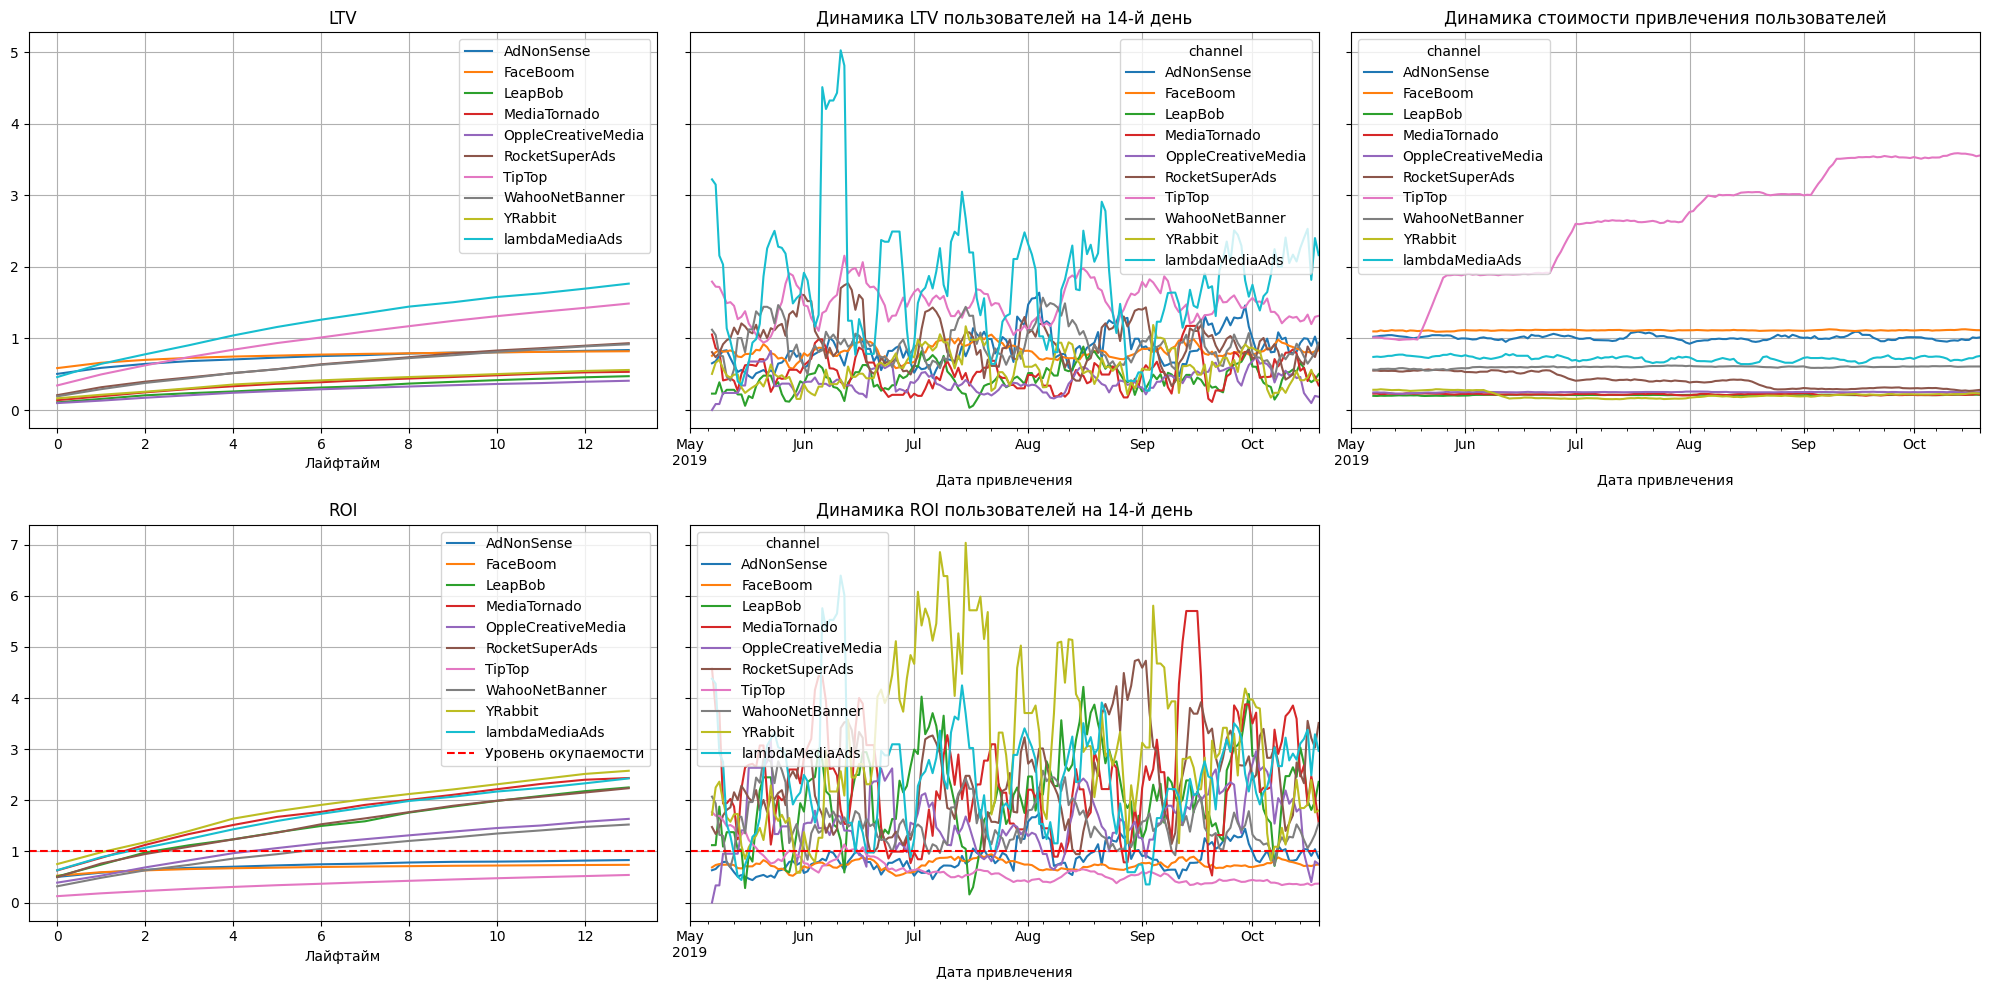

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


Из графиков можно сделать вывод, что рост стоимости привлечения связан именно с каналом TipTop. Остальные каналы имеют стабильную стоимость привлечения.
Также можно сказать, что FaceBoom и AdNonSense также не окупаются.

Для понимания, какие каналы привлечения эффективнее работают в Америке, а какие в Европе, построим те же графики в соответствующих срезах:

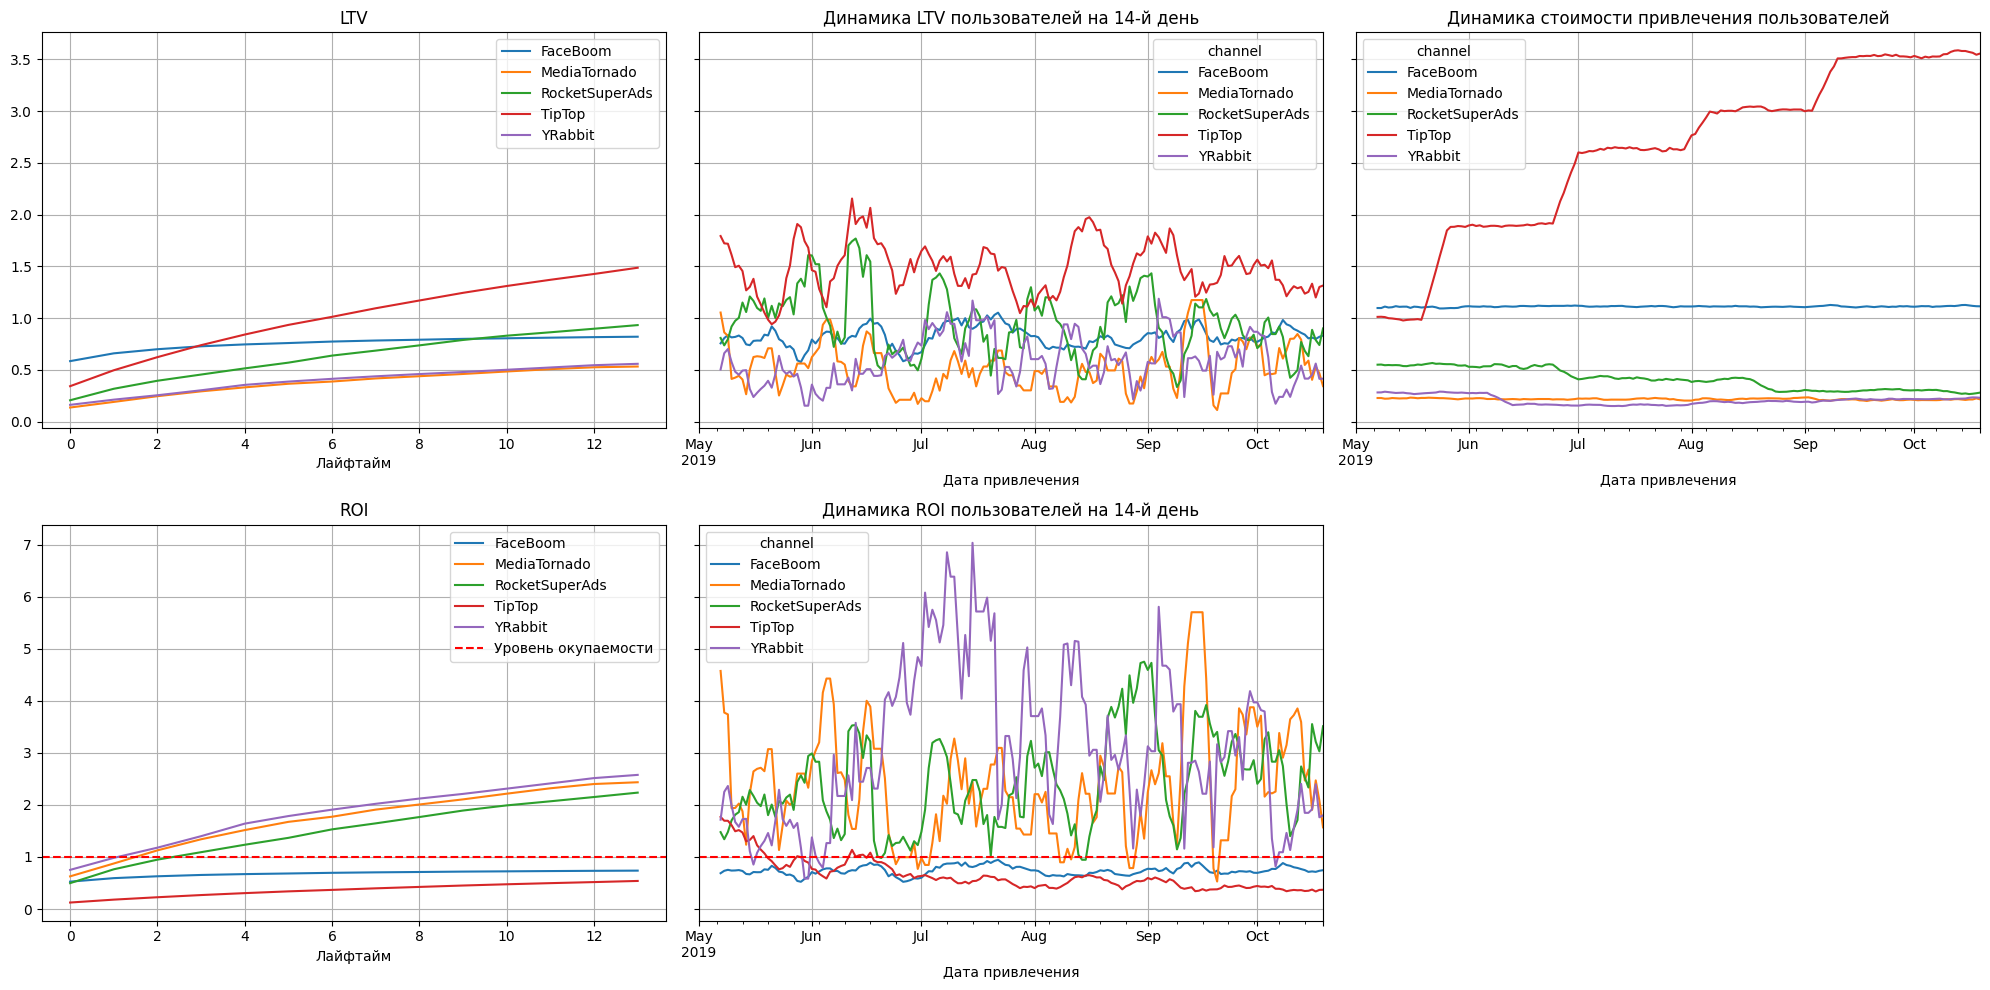

In [48]:
dimensions = ['channel']

profiles_not_org_USA = profiles_not_organic.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_org_USA, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видно, что наиболее эффективными каналами привлечения для Америки по ROI являются lambdaMediaAds и LeapBob.

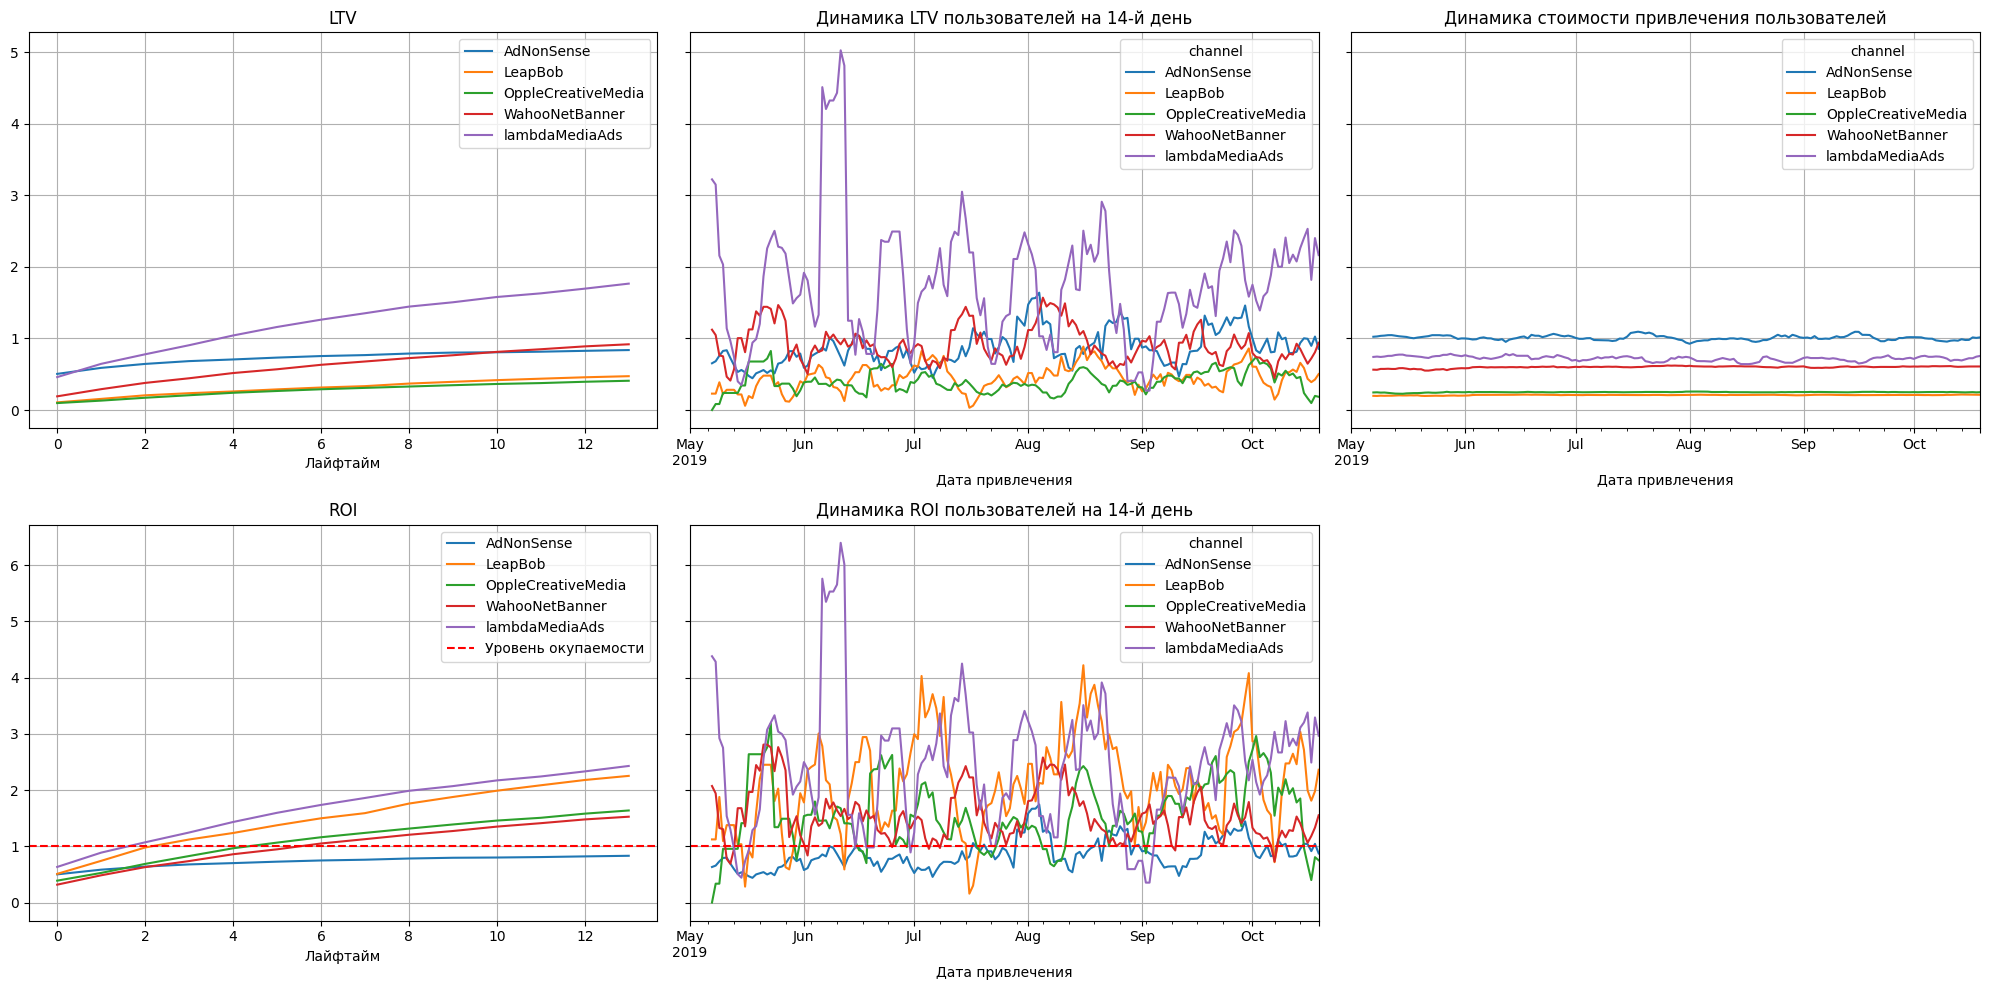

In [49]:
dimensions = ['channel']

profiles_not_org_Europe = profiles_not_organic.query('region != "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_org_Europe, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видно, что наиболее эффективными каналами привлечения для Европы по ROI являются YRabbit и MediaTornado.

## Выводы и рекомендации

1. Наибольшее количество пользователей приложения из США с устройств iPhone и Mac - это наиболее важный сегмент.
2. Реклама не окупается как раз в этом сегменте именно из-за резкого роста стоимости привлечения через канал TipTop (конверсия в данном канале высокая).
3. Необходимо расследовать, что явилось причиной роста CAC в канале TipTop. Возможно изменение стоимостной политики канала или просчёт рекламного отдела.
5. Канал FaceBoom не окупается. Он имеет низкое удержание. Маркетинговому отделу необходимо изучить почему. Возможно, через данный канал привлекается нецелевая аудитория.
6. Канал AdNonSense не окупается. Он имеют высокую конверсию, но низкое удержание, как и FaceBoom. Необходимо пересмотреть рекламные настройки AdNonSense, возможно, привлекается нецелевая аудитория. Отсюда и низкое удержание, и высокие расходы.
7. Не рекомендуется отказываться от платформ TipTop и FaceBoom, т.к. все они привлекает большое количество платящих пользователей. В случае невозможности повышения удержания и/или снижения затрат от канала AdNonSense можно отказаться, т.к. он привлекает незначительную часть пользователей (<2%)
8. Наиболее эффективными каналами с потенциалом для развития трафика выглядят каналы: 
 - для США: lambdaMediaAds и LeapBob.
 - для Европы: YRabbit и MediaTornado
 
 Маркетинговому отделу рекомендуется увеличить трафик из данных источников.